<a href="https://colab.research.google.com/github/jcdevaney/data71200su24/blob/main/class7/data71200class7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
!pip install mglearn
import mglearn

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 2.5 MB/s eta 0:00:00


# Import Iris Dataset and Creating Training and Testing Split

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=66,test_size=0.2)

# Dimensionality Reduction with PCA

## Explained Variance in PCA

In [4]:
from sklearn.decomposition import PCA

# keep all the principal components of the data
pca1 = PCA()
# fit PCA model to data
pca1.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca1.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.92671883 0.05121232 0.01635802 0.00571083]


In [5]:
# keep the first two principal components of the data
pca2 = PCA(n_components=2)
# fit PCA model to data
pca2.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca2.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.92671883 0.05121232]


In [6]:
# keep components to explain 95% of the variance
pca2 = PCA(n_components=0.95)
# fit PCA model to data
pca2.fit(X_train)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca2.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.92671883 0.05121232]


## PCA as a pre-processing step for classification

### No Pre-Processing

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

#model=LogisticRegression().fit(X_train, y_train)
#model = SVC(kernel='poly', C=10).fit(X_train, y_train)
model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.97


### Two Principal Components

In [8]:
# keep the first two principal components of the data
pca3 = PCA(n_components=2)
# fit PCA model to data
X_train_pca3 = pca3.fit_transform(X_train)
# transform data onto the first two principal components
X_test_pca3 = pca3.transform(X_test)

#model2=LogisticRegression().fit(X_train_pca3, y_train)
model2 = DecisionTreeClassifier(random_state=0).fit(X_train_pca3, y_train)

print("Accuracy on training set: {:.2f}".format(model2.score(X_train_pca3, y_train)))
print("Accuracy on test set: {:.2f}".format(model2.score(X_test_pca3, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.90


### 95% of Variance Explained

In [9]:
# keep the components that explain 95% of the variance in the data
pca4 = PCA(n_components=0.95)
# fit PCA model to data
X_train_pca4 = pca4.fit_transform(X_train)
# transform data onto the first two principal components
X_test_pca4 = pca4.transform(X_test)


#model=LogisticRegression().fit(X2_train, y2_train)
model3 = DecisionTreeClassifier(random_state=0).fit(X_train_pca4, y_train)

print("Accuracy on training set: {:.2f}".format(model3.score(X_train_pca4, y_train)))
print("Accuracy on test set: {:.2f}".format(model3.score(X_test_pca4, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.90


# Scale data

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA vs NMF

## Visualize PCA on unscaled data

### 2 components - unscaled

Text(0, 0.5, 'Principal components')

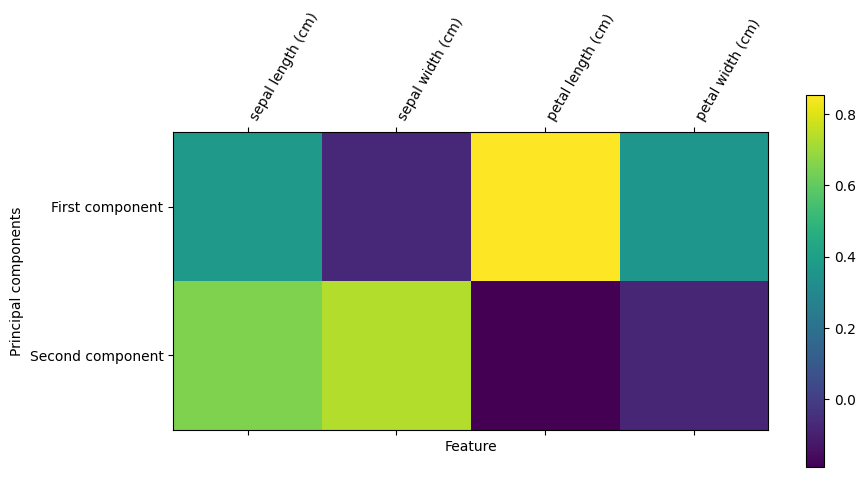

In [11]:
plt.matshow(pca3.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(iris.feature_names)),
           iris.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Text(0, 0.5, 'Second principal component')

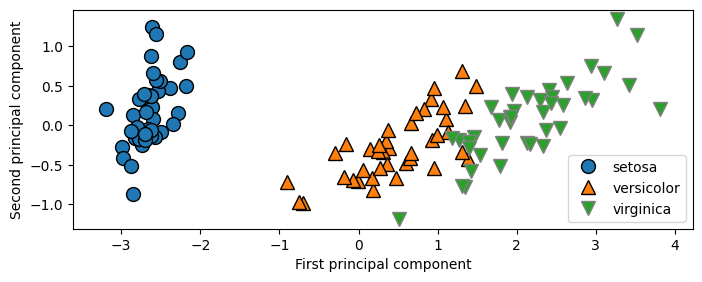

In [12]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_train_pca3 [:, 0], X_train_pca3 [:, 1], y_train)
plt.legend(iris.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

### 95 percent of variance - unscaled

Text(0, 0.5, 'Principal components')

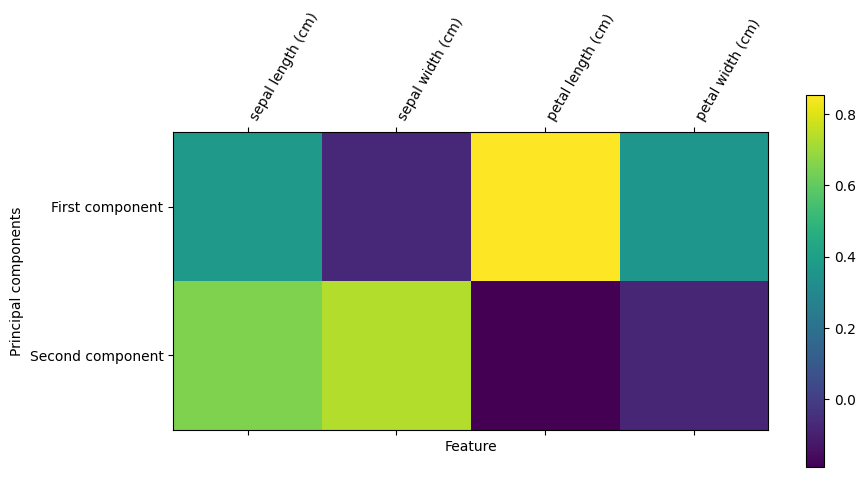

In [13]:
plt.matshow(pca4.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(iris.feature_names)),
           iris.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Text(0, 0.5, 'Second principal component')

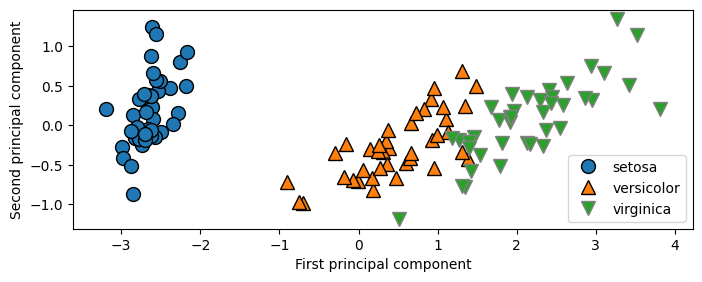

In [14]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_train_pca4[:, 0], X_train_pca4[:, 1], y_train)
plt.legend(iris.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

## Visualize PCA on scaled data

## 2 components - scaled

Accuracy on training set: 0.82
Accuracy on test set: 0.80


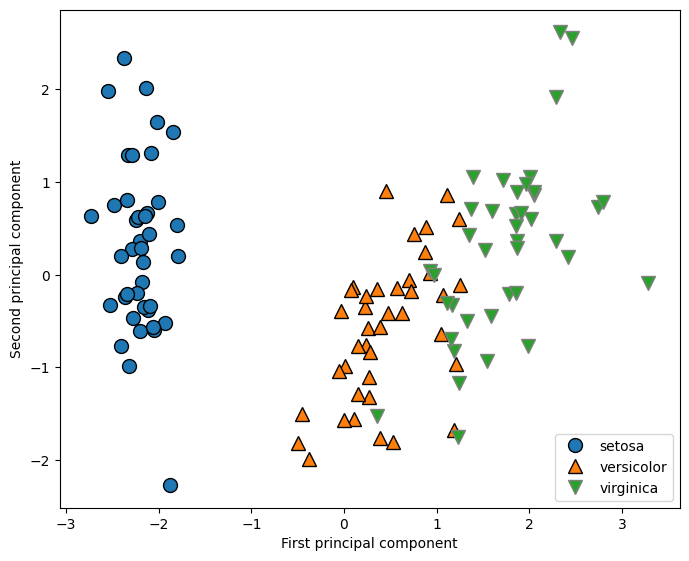

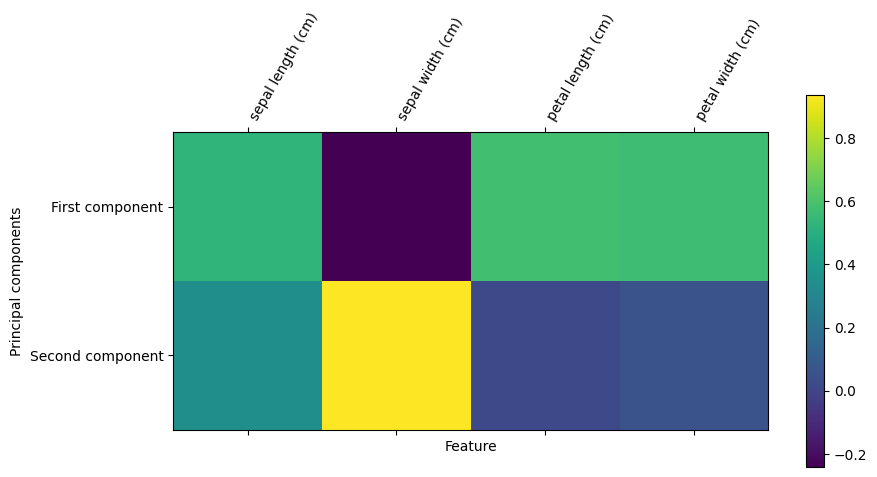

In [15]:
# keep the first two principal components of the data
pca5 = PCA(n_components=2)
# fit PCA model to data
X_train_pca5 = pca5.fit_transform(X_train_scaled)
# transform data onto the first two principal components
X_test_pca5 = pca5.transform(X_test_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_train_pca5[:, 0], X_train_pca5[:, 1], y_train)
plt.legend(iris.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

# visualize component contribution
plt.matshow(pca5.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(iris.feature_names)),
           iris.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

# evaluate Decision Tree performance
model4 = DecisionTreeClassifier(random_state=0).fit(X_train_pca5, y_train)

print("Accuracy on training set: {:.2f}".format(model3.score(X_train_pca5, y_train)))
print("Accuracy on test set: {:.2f}".format(model3.score(X_test_pca5, y_test)))

### 95 percent of variance - scaled

Accuracy on training set: 1.00
Accuracy on test set: 0.93


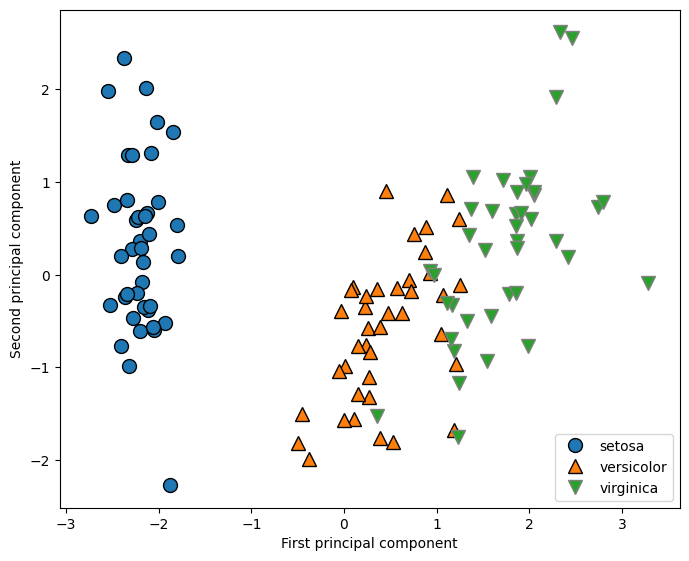

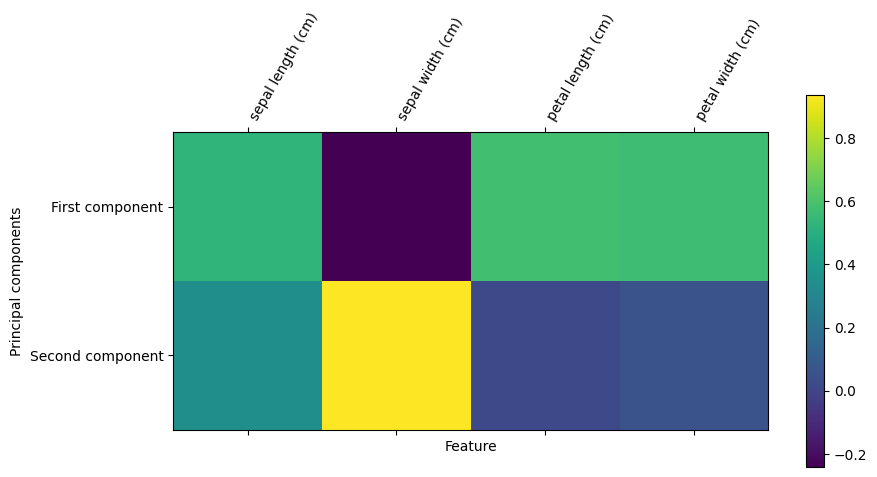

In [16]:
# keep the components that explain 95% of the variance in the data
pca6 = PCA(n_components=0.95)
# fit PCA model to data
X_train_pca6 = pca6.fit_transform(X_train_scaled)
# transform data onto the first two principal components
X_test_pca6 = pca6.transform(X_test_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_train_pca6[:, 0], X_train_pca6[:, 1], y_train)
plt.legend(iris.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

# visualize component contribution
plt.matshow(pca6.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(iris.feature_names)),
           iris.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

# evaluate Decision Tree performance
model4 = DecisionTreeClassifier(random_state=0).fit(X_train_pca6, y_train)

print("Accuracy on training set: {:.2f}".format(model4.score(X_train_pca6, y_train)))
print("Accuracy on test set: {:.2f}".format(model4.score(X_test_pca6, y_test)))


## Run NMF on unscaled data

Accuracy on training set: 1.00
Accuracy on test set: 0.93


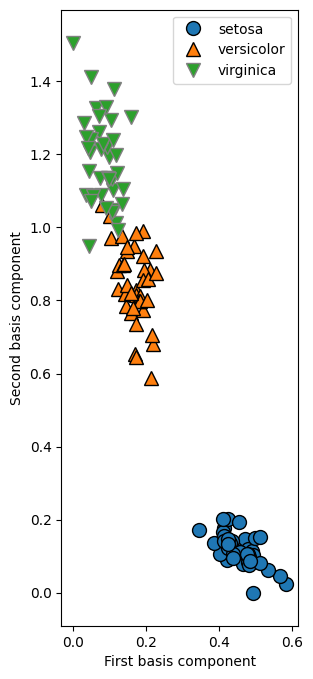

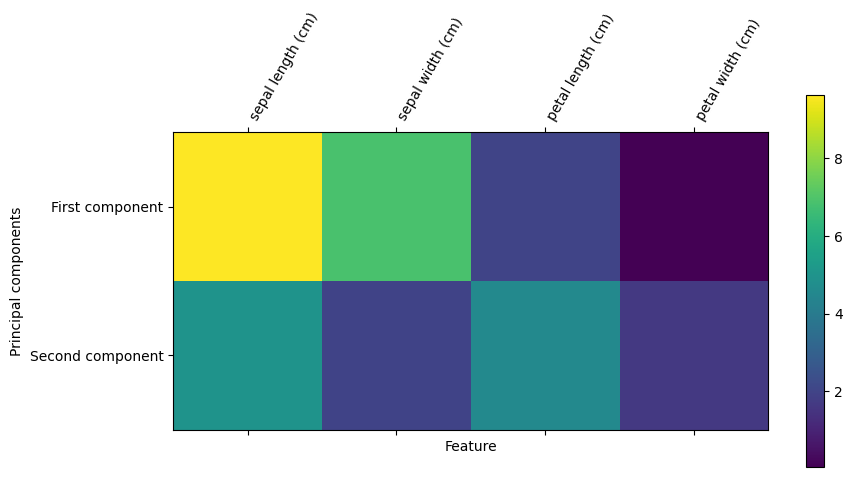

In [17]:
from sklearn.decomposition import NMF
# keep the first two principal components of the data
nmf = NMF(n_components=2, random_state=0)

# fit NMF model to data
# transform data onto the first two principal components
X_train_nmf = nmf.fit_transform(abs(X_train))
X_test_nmf = nmf.transform(abs(X_test))

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_train_nmf[:, 0], X_train_nmf[:, 1], y_train)
plt.legend(iris.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis component")
plt.ylabel("Second basis component")

# visualize component contribution
plt.matshow(nmf.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(iris.feature_names)),
           iris.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

# evaluate Decision Tree performance
model5 = DecisionTreeClassifier(random_state=0).fit(X_train_nmf, y_train)

print("Accuracy on training set: {:.2f}".format(model5.score(X_train_nmf, y_train)))
print("Accuracy on test set: {:.2f}".format(model5.score(X_test_nmf, y_test)))

## Run NMF on scaled data

Accuracy on training set: 1.00
Accuracy on test set: 0.70


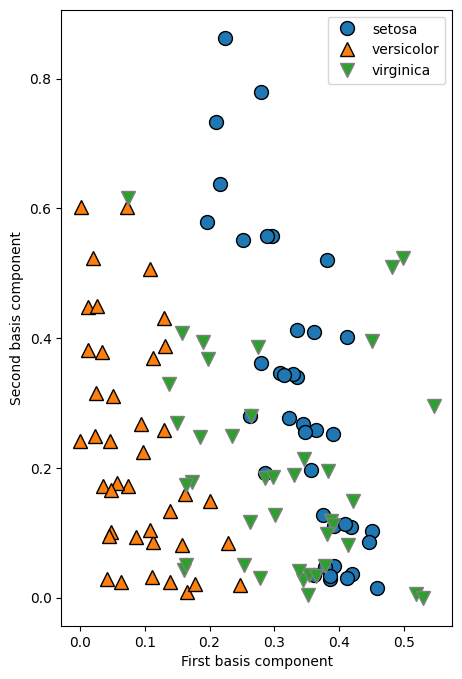

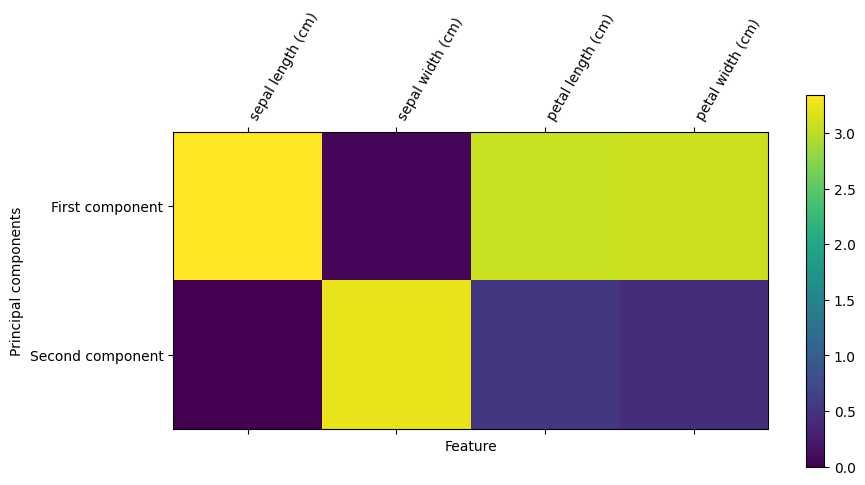

In [18]:
from sklearn.decomposition import NMF
# keep the first two components of the data
nmf1 = NMF(n_components=2, random_state=0)

# fit NMF model to data
# transform data onto the first two principal components
X_train_nmf1 = nmf1.fit_transform(abs(X_train_scaled))
X_test_nmf1 = nmf1.transform(abs(X_test_scaled))

# plot first vs. second component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_train_nmf1[:, 0], X_train_nmf1[:, 1], y_train)
plt.legend(iris.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis component")
plt.ylabel("Second basis component")

# visualize component contribution
plt.matshow(nmf1.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(iris.feature_names)),
           iris.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

# evaluate Decision Tree performance
model6 = DecisionTreeClassifier(random_state=0).fit(X_train_nmf1, y_train)

print("Accuracy on training set: {:.2f}".format(model6.score(X_train_nmf1, y_train)))
print("Accuracy on test set: {:.2f}".format(model6.score(X_test_nmf1, y_test)))

# TSNE

## Visualize T-SNE on unscaled training data

Text(0, 0.5, 'Second basis component')

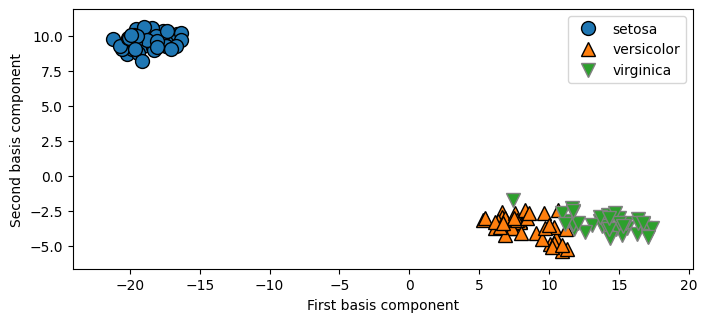

In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X_train)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne[:, 0], X_tsne[:, 1], y_train)
plt.legend(iris.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis component")
plt.ylabel("Second basis component")

## Visualize T-SNE on scaled training data

Text(0, 0.5, 'Second basis component')

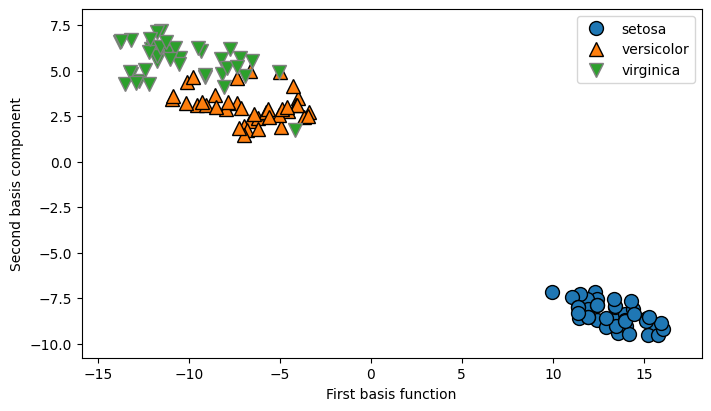

In [20]:
from sklearn.manifold import TSNE
tsne2 = TSNE(random_state=42)
X_tsne2 = tsne.fit_transform(X_train_scaled)

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_tsne2[:, 0], X_tsne2[:, 1], y_train)
plt.legend(iris.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First basis function")
plt.ylabel("Second basis component")